In [1]:
import heatmap
import seaborn as sns
import matplotlib.pyplot as plt

show_id = "tt5420376"
show_name = heatmap.get_show_name(show_id)
episodes = heatmap.get_episodes(show_id)
episode_ratings = heatmap.get_ratings(episodes)

In [2]:
df_merged = episodes.merge(episode_ratings, on='tconst', how='outer')
df_mapped = df_merged.pivot('episodeNumber', 'seasonNumber', 'averageRating')

print(df_mapped)

seasonNumber     1    2    3    4    5   6
episodeNumber                             
1              7.6  8.0  7.7  9.3  7.3 NaN
2              7.8  7.9  7.5  7.5  7.0 NaN
3              7.9  7.8  7.4  6.8  8.5 NaN
4              8.0  8.0  8.4  7.7  7.5 NaN
5              7.8  8.5  8.1  7.2  7.6 NaN
6              7.9  8.1  7.8  7.1  7.5 NaN
7              7.8  8.1  7.7  7.5  6.8 NaN
8              7.7  7.9  7.8  7.6  5.9 NaN
9              7.6  8.2  6.7  7.3  6.2 NaN
10             8.1  7.7  7.4  7.1  6.3 NaN
11             8.1  7.3  7.4  7.1  6.0 NaN
12             8.8  7.9  7.2  6.9  8.1 NaN
13             8.6  8.1  6.5  7.4  6.3 NaN
14             NaN  7.9  6.9  8.1  6.7 NaN
15             NaN  7.8  7.3  7.5  4.4 NaN
16             NaN  7.9  4.2  8.5  5.8 NaN
17             NaN  8.0  7.1  3.5  7.3 NaN
18             NaN  5.7  7.2  6.9  4.0 NaN
19             NaN  8.4  7.2  7.4  NaN NaN
20             NaN  8.4  7.7  NaN  NaN NaN
21             NaN  9.1  8.1  NaN  NaN NaN
22         

[Text(0.5, 48.5, 'Seasons'),
 Text(120.5, 0.5, 'Episodes'),
 Text(0.5, 1.0, 'Riverdale')]

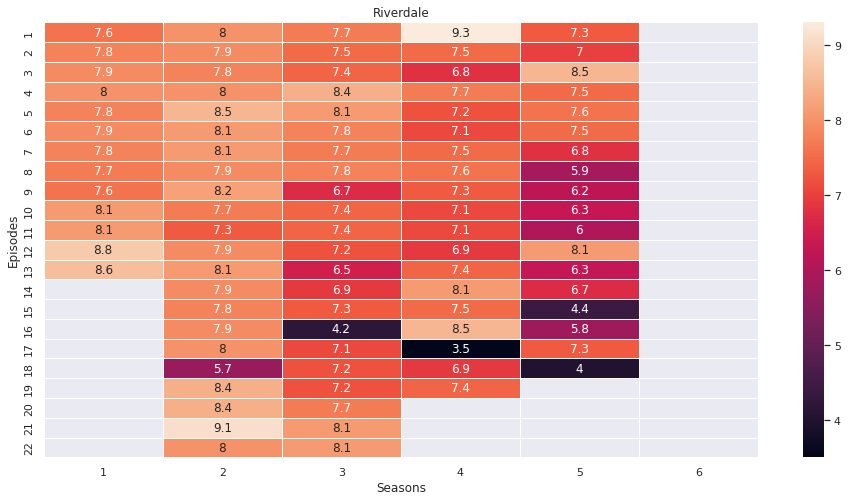

In [3]:
# size = (df_merged['seasonNumber'].max()//2+1, df_merged['episodeNumber'].max()//2+1)
sns.set(rc={'figure.figsize': (16,8)})
plt.tight_layout()

map = sns.heatmap(df_mapped,
    annot=True, 
    linewidths=0.5, 
    square=False) #vmin=0, vmax=10

map.set(xlabel='Seasons',
    ylabel='Episodes', 
    title=show_name)

In [4]:
figure = map.get_figure()
figure.savefig('./heatmaps/' + show_name+ ' - ' + show_id + '.png', 
    dpi=300, 
    pad_inches='0.1')